- We will do DataAnalysis on the Dataset that contains all relevant information concerning coffee, rice and beef prices on the market within last 30 years.
Basically We need to find trends and extract information on basis of Inflation Rate in the last 30 years for rice, coffe and beef.

**Inflation Rate**- Measures how much more expensive a set of goods and services has become over a certain period, usually a year.
The inflation rate is the percentage increase in the average level of prices of a basket of selected goods over time. **It indicates a decrease in the purchasing power of currency and results in an increased consumer price index (CPI)**. Put simply, the inflation rate is the rate at which the general prices of consumer goods increases when the currency purchase power is falling.

In [185]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [186]:
print(mpl.__version__)
print(sns.__version__)

3.7.3
0.12.2


In [187]:
df = pd.read_csv('rice_beef_coffee_price_changes.csv')

In [188]:
df

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64
358,2021,Dec,5.95,0.40,5.91,-1.29,0.39,5.87,5.83


## Understanding Data

In [189]:
df.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


In [190]:
df[df['Year']==2022]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
359,2022,Jan,5.97,0.43,5.98,NaN,NaN,NaN,NaN


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    object 
 2   Price_beef_kilo    360 non-null    float64
 3   Price_rice_kilo    360 non-null    float64
 4   Price_coffee_kilo  360 non-null    float64
 5   Inflation_rate     347 non-null    float64
 6   Price_rice_infl    347 non-null    float64
 7   Price_beef_infl    347 non-null    float64
 8   Price_coffee_infl  347 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB


In [192]:

rows= df.shape[0]
cols= df.shape[1]
df.shape

(360, 9)

In [193]:
df.describe()

,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
count,360.000000,360.000000,360.000000,360.000000,347.000000,347.000000,347.000000,347.000000
mean,2006.583333,3.152056,0.364083,2.999722,36.320029,0.476167,4.044006,3.953660
std,8.671906,1.167673,0.131201,1.164001,27.062804,0.135525,0.900393,1.460999
min,1992.000000,1.630000,0.160000,1.170000,-1.290000,0.240000,2.680000,1.770000
25%,1999.000000,2.117500,0.260000,2.265000,12.370000,0.390000,3.185000,3.065000
50%,2007.000000,2.730000,0.345000,2.940000,28.300000,0.460000,4.090000,3.680000
75%,2014.000000,4.220000,0.440000,3.605000,59.700000,0.550000,4.735000,4.565000
max,2022.000000,6.170000,0.910000,6.620000,89.590000,1.120000,6.930000,9.760000


##### Lets Explore all the columns Meaning

In [194]:
df.columns

Index(['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl',
       'Price_beef_infl', 'Price_coffee_infl'],
      dtype='object')

1. **Year**= Year of a Product's Price
2. **Month**= Month of a Product's Price It's in the Object Type. Not in Numerical format.
3. **Price_beef_kilo**= 1 kilo Beef Price in USD.
4. **Price_rice_kilo**= 1 kilo Rice Price in USD.
5. **Price_coffee_kilo**= 1 kilo Coffe Price in USD.
6. **Inflation_rate** = Rate of Inflation in the Year's Month
7. **Price_rice_infl**= Price of 1 Kilo of Rice in USD (Adjusted for inflation)
8. **Price_beef_infl**= Price of 1 Kilo of Beef in USD (Adjusted for inflation)
9. **Price_coffee_infl**= Price of 1 Kilo of Coffee in USD (Adjusted for inflation)


## Cleaning of Data

### NULL VALUES

YEAR

In [195]:
df[df['Year'].isnull()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl


In [196]:
df[df['Month'].isnull()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl


Price_beef_kilo

In [197]:
df[df['Price_beef_kilo'].isnull()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl


Inflation_rate

LETS MAKE A FUNCTION THAT GIVES US NULL VALUES INFO

In [198]:
def nullfunc(a):
    temp = pd.DataFrame(index=a.columns)
    temp['not_null_values']= a.count()
    temp['null_values']=a.isnull().sum()
    temp['unique']= a.nunique()
    return temp

In [199]:
nullfunc(df)

,not_null_values,null_values,unique
Year,360,0,31
Month,360,0,12
Price_beef_kilo,360,0,201
Price_rice_kilo,360,0,53
Price_coffee_kilo,360,0,227
Inflation_rate,347,13,29
Price_rice_infl,347,13,55
Price_beef_infl,347,13,192
Price_coffee_infl,347,13,241


In [200]:
df[df['Inflation_rate'].isnull()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
167,2006,Jan,2.62,0.29,2.74,NaN,NaN,NaN,NaN
168,2006,Feb,2.65,0.30,2.63,NaN,NaN,NaN,NaN
169,2006,Mar,2.62,0.30,2.51,NaN,NaN,NaN,NaN
170,2006,Apr,2.60,0.30,2.54,NaN,NaN,NaN,NaN
171,2006,May,2.62,0.31,2.41,NaN,NaN,NaN,NaN
172,2006,Jun,2.57,0.31,2.27,NaN,NaN,NaN,NaN
173,2006,Jul,2.62,0.32,2.31,NaN,NaN,NaN,NaN
174,2006,Aug,2.66,0.31,2.46,NaN,NaN,NaN,NaN
175,2006,Sep,2.68,0.31,2.42,NaN,NaN,NaN,NaN
176,2006,Oct,2.69,0.30,2.44,NaN,NaN,NaN,NaN


##### Now there are 12 rows of Year 2006 and 1 row of year 2022 having Null values in all the 4 columns 'Inflation_rate,	Price_rice_infl,	Price_beef_infl,	Price_coffee_infl'. Replacing them with Mean and Median Value of a Column will be Inappropriate. 


In [201]:
df['Year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

#### Now Here I am assuming this Data about Inflation in the Particular Year will be available On Internet. So, taking from there.

-Since The DataSet was Last Update in 2022. Hence taking Inflation on 2022 Year basis.

. Inflation Rate in 2006 = ((CPI in 2022 − CPI in 2006)/ CPI in 2006) * 100 \
. ​Inflation Rate 2006 = 45.56%            

. Inflation Rate in 2022 = ((CPI in 2022 − CPI in 2022)/ CPI in 2022) * 100 \
. ​Inflation Rate 2006 = 0.00%     

In [202]:
df['Inflation_rate'].fillna('45.56', inplace=True)
df.loc[359,['Inflation_rate']]= 0.00

In [203]:
df[df['Inflation_rate'].isnull()]

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl


In [204]:
df[df['Year']==2006] 

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
167,2006,Jan,2.62,0.29,2.74,45.56,NaN,NaN,NaN
168,2006,Feb,2.65,0.30,2.63,45.56,NaN,NaN,NaN
169,2006,Mar,2.62,0.30,2.51,45.56,NaN,NaN,NaN
170,2006,Apr,2.60,0.30,2.54,45.56,NaN,NaN,NaN
171,2006,May,2.62,0.31,2.41,45.56,NaN,NaN,NaN
172,2006,Jun,2.57,0.31,2.27,45.56,NaN,NaN,NaN
173,2006,Jul,2.62,0.32,2.31,45.56,NaN,NaN,NaN
174,2006,Aug,2.66,0.31,2.46,45.56,NaN,NaN,NaN
175,2006,Sep,2.68,0.31,2.42,45.56,NaN,NaN,NaN
176,2006,Oct,2.69,0.30,2.44,45.56,NaN,NaN,NaN


In [205]:
df[df['Year']==2022] 

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
359,2022,Jan,5.97,0.43,5.98,0.0,NaN,NaN,NaN


So, Here We have got the Inflation Rate for 2006 and 2022. Now Let's calculate the Inflation Price for Rice, Beef and Coffee in
these Given Years.

**Inflation Price**= price * (1+ Inflation Rate/100)

In [206]:
def inflafunc(inf,price):
    return round(float(price) * (1 + float(inf)/100),2)
    

In [207]:
df.loc[df['Year'].isin([2006,2022]),'Price_rice_infl']=df.loc[df['Year'].isin([2006,2022])].apply(lambda x: inflafunc(x['Inflation_rate'],x['Price_rice_kilo']),axis=1)

In [208]:
df.loc[df['Year'].isin([2006,2022]),'Price_beef_infl']=df.loc[df['Year'].isin([2006,2022])].apply(lambda x: inflafunc(x['Inflation_rate'],x['Price_beef_kilo']),axis=1)

In [209]:
df.loc[df['Year'].isin([2006,2022]),'Price_coffee_infl']=df.loc[df['Year'].isin([2006,2022])].apply(lambda x: inflafunc(x['Inflation_rate'],x['Price_coffee_kilo']),axis=1)

In [210]:
df[df['Year']==2006] 

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
167,2006,Jan,2.62,0.29,2.74,45.56,0.42,3.81,3.99
168,2006,Feb,2.65,0.30,2.63,45.56,0.44,3.86,3.83
169,2006,Mar,2.62,0.30,2.51,45.56,0.44,3.81,3.65
170,2006,Apr,2.60,0.30,2.54,45.56,0.44,3.78,3.70
171,2006,May,2.62,0.31,2.41,45.56,0.45,3.81,3.51
172,2006,Jun,2.57,0.31,2.27,45.56,0.45,3.74,3.30
173,2006,Jul,2.62,0.32,2.31,45.56,0.47,3.81,3.36
174,2006,Aug,2.66,0.31,2.46,45.56,0.45,3.87,3.58
175,2006,Sep,2.68,0.31,2.42,45.56,0.45,3.90,3.52
176,2006,Oct,2.69,0.30,2.44,45.56,0.44,3.92,3.55


In [211]:
nullfunc(df)

,not_null_values,null_values,unique
Year,360,0,31
Month,360,0,12
Price_beef_kilo,360,0,201
Price_rice_kilo,360,0,53
Price_coffee_kilo,360,0,227
Inflation_rate,360,0,31
Price_rice_infl,360,0,55
Price_beef_infl,360,0,199
Price_coffee_infl,360,0,244


Finally We have got rid of Null Values. Let's see Duplicate Values

## DUPLICATE VALUES

For Duplicate Values We need to find those rows where Year and Month are same for all other values. Otherwise, Prices and Inflation can be  same for Different Year Months or Same Year Months.

In [212]:
years= list(map(str, range(1992,2023)))

In [213]:
df1=pd.DataFrame(df[['Year','Month']].value_counts()).reset_index()
df1.set_index('Year',inplace=True)
df1=df1.sort_values('Year', ascending=True)
# df1.transpose()
# df1[years].transpose()
df1

,Month,count
Year,,
1992,Apr,1
1992,Sep,1
1992,Oct,1
1992,Nov,1
1992,May,1
...,...,...
2021,Dec,1
2021,Aug,1
2021,Apr,1


In [214]:
df1[df1['count']>1]

,Month,count
Year,,


So there are no duplicate rows having same Month and Year. Hence, we are good with the Data Cleaning.
Let's go to the Problem Statements.

## DATA TYPE

In [215]:
df.dtypes

Year                   int64
Month                 object
Price_beef_kilo      float64
Price_rice_kilo      float64
Price_coffee_kilo    float64
Inflation_rate        object
Price_rice_infl      float64
Price_beef_infl      float64
Price_coffee_infl    float64
dtype: object

#### Let's change the Inflation Rate column into float data type.

In [216]:
def data_func(a):
    return float(a)

In [217]:
df['Inflation_rate']= df['Inflation_rate'].apply(lambda x: data_func(x))

In [218]:
df.dtypes

Year                   int64
Month                 object
Price_beef_kilo      float64
Price_rice_kilo      float64
Price_coffee_kilo    float64
Inflation_rate       float64
Price_rice_infl      float64
Price_beef_infl      float64
Price_coffee_infl    float64
dtype: object

## PROBLEM STATEMENT

In [219]:
df.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


***1. What is the Corelation b/w columns??***  \
***2. What is the difference/similarity in prices of rice, beef, coffee over the years?*** \
***3. How's the Inflation Rate over the Years?*** \
***4. What is the effect of Inflation in price of rice, beef, coffee over the years?*** \
***5. Which Commodity Products got effected most and least in terms of Inflation till 2022?*** \
***6. How's the Inflation Rate within a year Season Wise(is it same for every year ups and down in seasons)?*** \


## 1.What is the Corelation b/w columns year wise??

### Here we will analyze data on Yearly Average Basis for the whole Dataset Columns.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    object 
 2   Price_beef_kilo    360 non-null    float64
 3   Price_rice_kilo    360 non-null    float64
 4   Price_coffee_kilo  360 non-null    float64
 5   Inflation_rate     360 non-null    float64
 6   Price_rice_infl    360 non-null    float64
 7   Price_beef_infl    360 non-null    float64
 8   Price_coffee_infl  360 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB


In [239]:
df1= df.groupby('Year')[['Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl',
       'Price_beef_infl', 'Price_coffee_infl']].mean().reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               31 non-null     int64  
 1   Price_beef_kilo    31 non-null     float64
 2   Price_rice_kilo    31 non-null     float64
 3   Price_coffee_kilo  31 non-null     float64
 4   Inflation_rate     31 non-null     float64
 5   Price_rice_infl    31 non-null     float64
 6   Price_beef_infl    31 non-null     float64
 7   Price_coffee_infl  31 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.1 KB


<!-- **How to Read a Correlation Heatmap?**

In this section, we will delve into how to read a correlation heatmap, an effective visual tool for discerning the strength and direction of relationships between variables:

. Look at the color of each cell to see the strength and direction of the correlation. \
. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. \
. Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by warm colors, such as red or orange. \
. Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by cool colors, such as blue or green. -->

^ Reading

<Axes: >

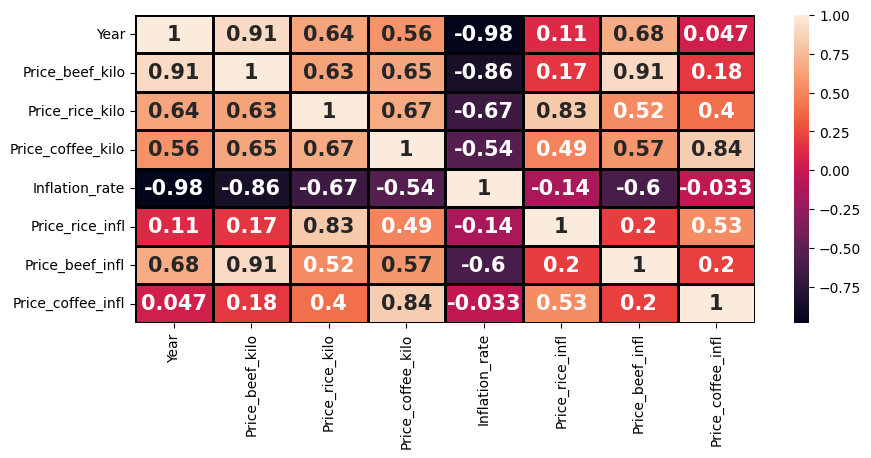

In [236]:
plt.figure(figsize=(10,4))
sns.heatmap(df1.corr(), annot=True, annot_kws=dict(size=15, weight='bold'), linewidths=0.8, linecolor='black', xticklabels=1, yticklabels=1)

So On a Yearly Basis,
- As the Year Increases The Price of Beef, Coffee and Rice Increases too. The Price of Beef have a strong Correlation with Year though.
- As the Year Increases, Products Inflation Price Increases too.  But there's a weak corelation of Year with Price_rice_inflation and Price_coffee_inflation.
- While Inflation Rate Decreases with increasing Year which is normal as we are comparing Inflation of Years with the Current Year 2022. So, as the Year Increases Inflation Rate will be less.
- There's a strong Corelation between the 3 Commodity Product Prices and their Adjusted Inflation Prices too.

***While with Inflation all columns have a Negative Relation, which shows as the Inflation Rate Increases while going down from 2022 to 1992, all the Products Prices Decreases almost for major number of years concluding inflation in terms of USD Currency over years.***

. It shows the power of USD currency to buy products have decreased over the years.

In [237]:
df1.head(2)

,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,2.443636,0.268182,1.391818,89.59,0.506364,4.633636,2.639091
1,1993,2.616667,0.235833,1.560000,84.15,0.435000,4.820000,2.873333


## 2. What is the difference/similarity in prices of rice, beef, coffee over the years?

df1 contains the mean for every column values within a year.

In [240]:
df1.set_index('Year', inplace=True)
# df1.reset_index()

In [225]:
years= list(range(1992, 2023))
# years

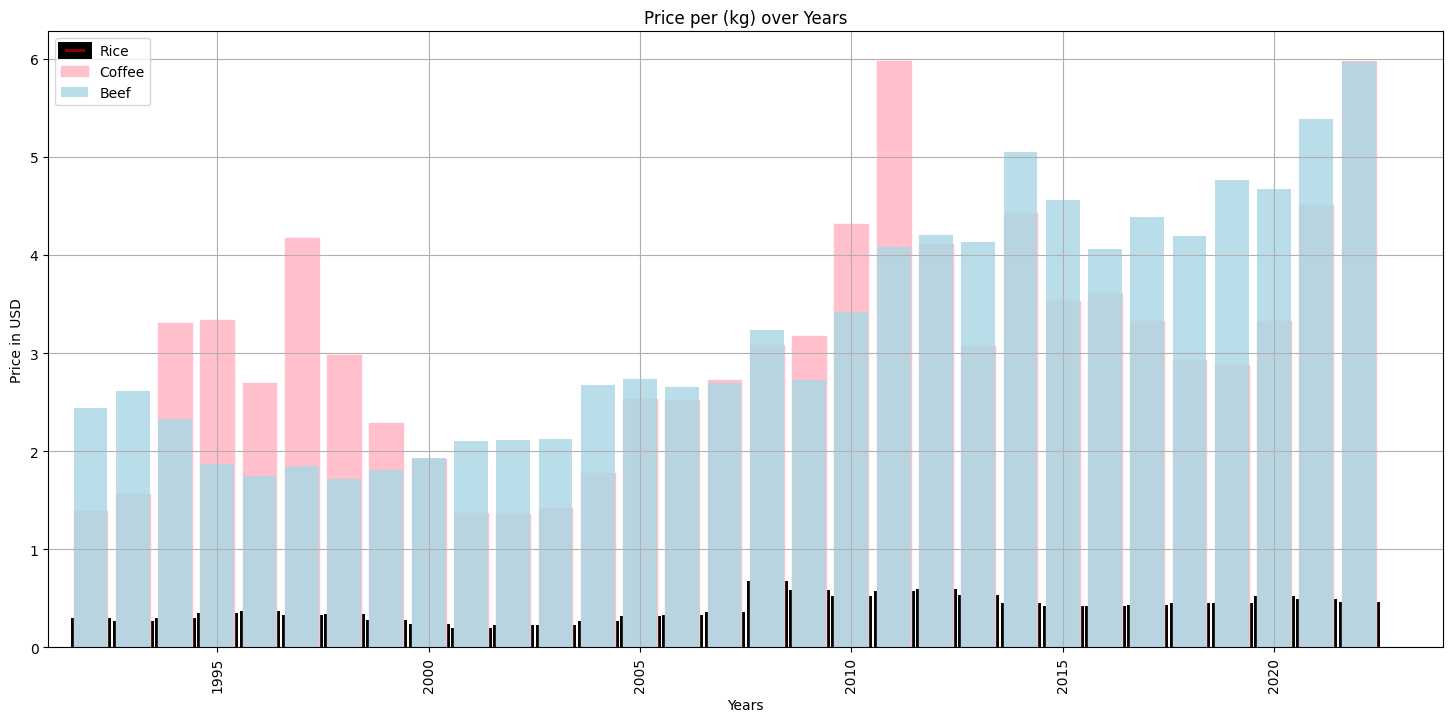

In [226]:
fig, ax = plt.subplots(figsize=(18, 8))
df1.index = df1.index.map(int)
# ax.hist(df_p)
ax1= ax.bar(df1.index, df1['Price_rice_kilo'], color='darkred', linewidth=5, alpha=1,edgecolor='black')
ax2= ax.bar(df1.index, df1['Price_coffee_kilo'], color='pink', linewidth=1, alpha=1, edgecolor='pink')
ax3= ax.bar(df1.index, df1['Price_beef_kilo'], color='lightblue',alpha=0.85)
plt.title('Price per (kg) over Years')
plt.xlabel('Years')
plt.xlim(1991, 2024)
plt.xticks(rotation=90)
plt.ylabel('Price in USD')
ax.legend(['Rice','Coffee','Beef'], loc='upper left')
# plt.text(1998,2.0, "Beef")
ax.grid(True)
plt.show()

Similarity b/w Prices of Rice, Beef, Coffee--
- For Rice and Coffee the Price graph is lowest between 2000 and 2004. Beef have it's Price graph lower from even befor( 1995-2004).
- For Beef the Price have a consistent increase from 2004 Onwards till 2014.
- For Rice Price have a consistent increase from 2004 Onwards till 2008.
- For Coffee Price have a consistent increase from 2004 Onwards till 2011.

**Highest Price Year:**   
- Coffee: 2022        
- Rice:   2008          
- Beef:   2022         

**Lowest Price Year:**
- Coffee: 2002
- Rice:   2001
- Beef:   1998


Difference b/w Prices of Rice, Beef, Coffee--
- Coffe have Quite Highest Prices in all 3 Commodity Products. Coffe have highest Price in Years 2011 and 2022. 
- Beef have Highest Price in 2021-22 and 2014.
- Rice have highest Price in 2008-09 & 2011-12.
- Coffee have quite the Most Unstable flow in it's Prices from 1992-2022 as comparison to Beef and Rice.
- Rice have been the cheapest Product one among all the 3 Commodity Products.

<!-- Among all the Commodity Products, Beef have a constant Increasing Trend in it's Price from 1992-2022 as comparison to Rice and Coffee. -->


In [227]:
df1[df1['Price_coffee_kilo']==df1['Price_coffee_kilo'].max()]

,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
Year,,,,,,,
2022,5.97,0.43,5.98,0.0,0.43,5.97,5.98


 ## 3. How's the Inflation Rate over the Years?

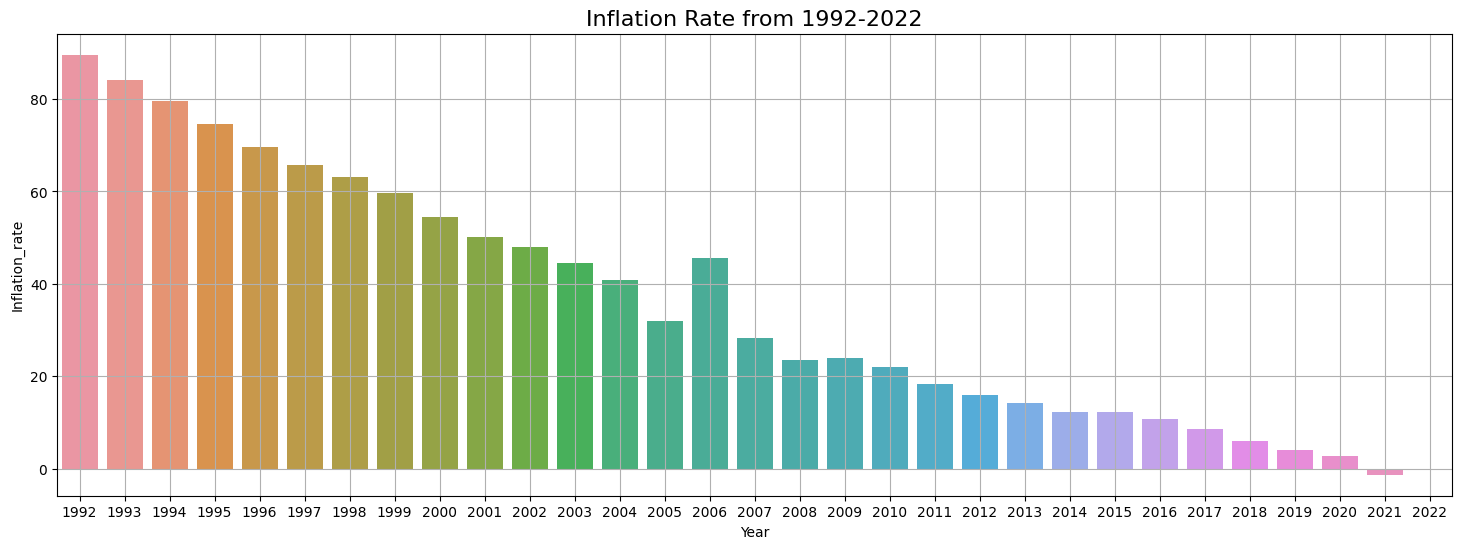

In [228]:
plt.figure(figsize=(18,6))

sns.barplot(x=df1.index, y=df1['Inflation_rate'])
plt.title('Inflation Rate from 1992-2022', size=16)
plt.grid()

The Inflation Rate have a gradual decrease as we go towards 2022. This graph shows how much Inflation have increased in the current year while comparing it with past years. 
- For 1992 the Inflation Rate is more than 80%. It means if a product cost was 10 USD at that time, today with the 80+% rate it will cost you more than  18 USD. It shows how much the power of USD have Increased in 2022 from 1992.

- In 2006, the Inflation Rate is very high from 2005.

- In 2021, the Inflation Rate is in negative value.

A negative inflation rate, also known as deflation, means that the general price level of goods and services in an economy is falling over time. In   simpler terms, things are getting cheaper, not more expensive \
-Increased purchasing power: Your money becomes more valuable because it can buy more goods and services..

## 4. What is the effect of Inflation in price of rice, beef, coffee over the years?
## 5. Which Commodity Products got effected most and least in terms of Inflation till 2022?

In [229]:
df1['Price_beef_infl'].min()

2.8016666666666663

Text(2011, 7.069166666666667, 'Coffee_Max_Infl_price')

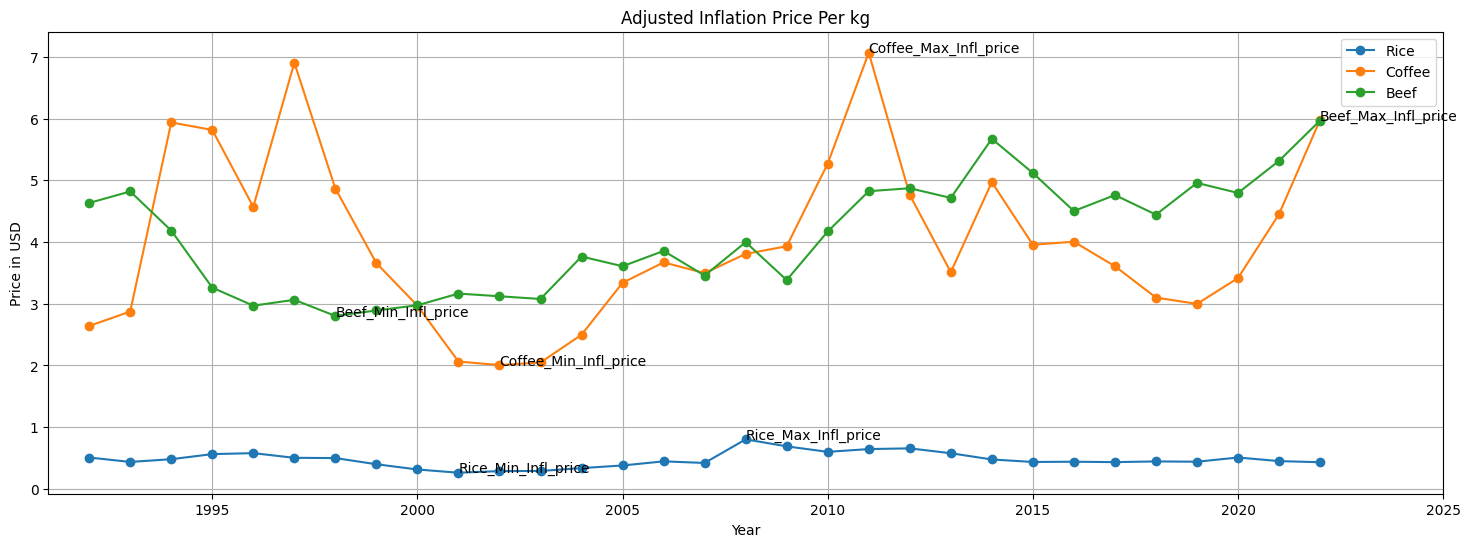

In [241]:
fig,ax = plt.subplots(figsize=(18,6))
ax1=ax.plot(df1.index, df1['Price_rice_infl'], marker='o')
ax2=ax.plot(df1.index, df1['Price_coffee_infl'], marker='o')
ax3=ax.plot(df1.index, df1['Price_beef_infl'], marker='o')
plt.title('Adjusted Inflation Price Per kg')
plt.xlabel('Year')
plt.xlim(1991,2025)
plt.ylabel('Price in USD')
ax.legend(['Rice','Coffee','Beef'])
ax.grid()
plt.annotate("Beef_Min_Infl_price",(1998,df1['Price_beef_infl'].min()))
plt.annotate("Rice_Min_Infl_price",(2001,df1['Price_rice_infl'].min()))
plt.annotate("Coffee_Min_Infl_price",(2002,df1['Price_coffee_infl'].min()))
plt.annotate("Beef_Max_Infl_price",(2022,df1['Price_beef_infl'].max()))
plt.annotate("Rice_Max_Infl_price",(2008,df1['Price_rice_infl'].max()))
plt.annotate("Coffee_Max_Infl_price",(2011,df1['Price_coffee_infl'].max()))

#### - Rice has the most stable price adjusted with Inflation over years. It has been affected least with Inflation.
#### - Coffe has the least stable price adjusted with Inflation over years. It has been affected most with Inflation.

In [ ]:
# df1.tail(13)

### Beef

**Beef has a downfall in it's Price Inflation from 1993-1998.**
According to marketing.uwagec.org, beef demand declined by an average of 1.3% annually from 1992 to 1998 due to increasing female labor force participation. 

**While has a increase in it's Price Inflation from 2009-2014.**

##### Beef prices increased in 2014 due to a combination of factors: 
1. Low cattle inventories: Cattle numbers were at their lowest level since the 1950.
2. 
High demand: Beef demand remained high, even as cattle numbers decrease
3.
Low cattle prices: Beef producers reduced herds to record lows as corn prices sped.ik
4.
Technological advancements: Technological advancements mean that fewer cattle are needed to produce the same amount o
  ee

f.
Between 2009 and 2014, the average inflation rate of the dollar was 1.60% per year, with a cumulative price increase of 10.35%. This means that a dollar in 2009 has the same purchasing power as $1.07401 in 2014.

**Adjusted Inflation Lowest Price**: 2.80 USD Yearly Avg in 1998

**Adjusted Inflation Highest Price**: 5.97 USD Yearly Avg in 2022


### Rice

**Rice has a downfall in it's Price Inflation from 1995-2001.**
The export price of rice decreased until 2001, when the Thai baht (THB) appreciated against the US dollar (USD). Dawe (2002) estimated that a 10% USD against the Thai baht results in a 22$/mt decrease in global rice prices. 

**Rice has a increase in it's Price Inflation during 2007-2008.**
The price of rice increased 224% between January 2007 and mid-2008. This increase was not due to a shortage of rice or crop failure. Instead, the following factors contributed to the rise in rice prices

1. Trade restriction: Major suppliers, including India and Vietnam, imposed export restrictions to control domestic inflation2. Panic buying: Large importers panicked and bought rice.
3. 
Weak dollar: The dollar was akk-  
4. 
Record oil prices: Oil prices were at record le 
 .


#### Rice has a downfall in it's Price Inflation from 2009-2017

The largest decrease occurred between 2008 and 2010, followed by a period of relative stability until 2017. After that, there was a slight upward trend, but prices remained significantly lower than the 2008 peak throughout the timeframe.

Factors contributing to the decrease:
Increased rice production: Global rice production increased significantly over this period due to factors like improved farming techniques, expande  d irrigation, and technological advancemens2\
 .
Trade policies: Some major rice-producing countries like Vietnam and Thailand implemented policies that encouraged exports, leading to increased supply and lower prices in the global mat. \
 t.
Macroeconomic factors: Global economic stability and low inflation rates during much of this period also contributed to stable or declining rice prices.

##### Adjusted Inflation Lowest Price: 0.26 USD Yearly Avg in 2001

##### Adjusted Inflation Highest Price: 0.80 USD Yearly Avg in 2008


### Coffee

**Since Coffe have been effected most by Inflation from 1980-2022. There are very high ups and down in Price Inflation for Coffee. The average price of coffee increased 39% annually from 1975 to 2020.**

- The coffee prices are clearly unstable. The chart shows the price per kg of coffee. Of course, the brands you buy coffee beans and to-go coffee from   are much more price stable.

- In the mid-1990s, coffee prices increased due to a scarcity of supply caused by weather conditions. This period of higher prices made up for the  losses incurred when the International Coffee Agreement's quota system was dismantled in 1989. - 
The boom in coffee prices in the mid-1990s also led to many Vietnamese entering coffee production. By 1999, Vietnam's coffee output had grown to over  11 million bags, second only to Brazil.
However, in the late 1990s and early 2000s, coffee prices collapsed, falling from about $1.50 per pound to $0.46 per pound in 200  --   
Since 1975, the lowest price seen is in 2002, when you could purchase 1 pound of coffee for a yearly average o$  $0.5569. This is actuallye   e lowest price seen in 100years and known as the 2001 coffee crisis. The highest yearly average price was in 2011 when one pound of coffee did tos   ar  $2.53.--  

That is a pretty big price increase. From 2002 to 2011, the price increased by over 350%. A yearly average price increase of 39%!?. Not even oil   had the same price increase during the same yers.

                                                                                                                      


##### Adjusted Inflation Lowest Price: 2.005 USD Yearly Avg in 2002

##### Adjusted Inflation Highest Price: 7.07 USD Yearly Avg in 2011

In [ ]:
df1[df1['Price_coffee_infl']==df1['Price_coffee_infl'].max()]

## How's the Inflation Rate within a year Seasonal Wise(is it same for every year ups and down in seasons)?

<!-- 
Adjusted Inflation Price in Detail with an Example
Adjusted inflation price refers to the price of a good or service in a previous year, expressed in terms of its equivalent purchasing power in a current year, taking into account inflation. In simpler terms, it's how much the good or service would cost back then if your money had the same buying power as it does now.

Here's how it works:

Identify the original price and year: Choose the good or service and the year you want to investigate its inflation-adjusted price.
Find the inflation rate: Look up the average inflation rate for the period between the original year and the current year. (Use reliable sources like government statistics or financial institutions.)
Apply the inflation formula: Multiply the original price by the ratio of the current inflation index to the inflation index of the original year.
Formula:

Adjusted Inflation Price = Original Price * (Current Inflation Index / Historical Inflation Index)
Example:

Let's say you bought a gallon of milk for $3.00 in 2020. In 2024, the average inflation rate was 3%. What would be the inflation-adjusted price of that gallon of milk in 2020?

Original price and year: $3.00 in 2020
Inflation rate: 3% between 2020 and 2024
Inflation indices:
Current inflation index for 2024: 1.03 (assuming 100 represents base year prices)
Historical inflation index for 2020: 1.00 (base year)
Calculation:

Adjusted Inflation Price = $3.00 * (1.03 / 1.00) = $3.09

Therefore, in terms of purchasing power, that  3.00 Dollar gallon of milk in 2020 would be equivalent to spending $ 3.09 in 2024 due to inflation. -->

^ Above Some Inflation Info

<!-- ##### matlab agar ek kilo beef 1992 m 2.52 $ ka tha to usi Dollar ki power m vo beef 89.59% Inflation se 2022 m 4.78 $ m milta.
##### Dollar ki power to buy beef falled that's why beef price to buy increases. -->

### Let's Group our Data on basis of Seasons Instead on Month Basis.

In [ ]:
df['Month'].unique()

In [ ]:
df['Month'].replace({'Jan':'Winter', 'Feb':'Winter','Mar':'Spring', 'Apr':'Spring', 'May':'Spring', 'Jun':'Summer', 'Jul':'Summer', 'Aug':'Summer', 'Sep':'Fall', 'Oct':'Fall',
       'Nov':'Fall', 'Dec':'Winter'}, inplace=True)

In [ ]:
df.head()

In [ ]:
df2=df.groupby(['Month','Year']).mean().reset_index()
df2= df2.sort_values(['Year'])
# df2.set_index('Year', inplace=True)
# df2

#### Inflation-adjusted prices are also known as real prices. Real prices keep the value of currency constant and allow for comparison of the exchange value of a good or service across different time periods. 


In [ ]:
plt.figure(figsize=(22,5))
sns.barplot(x='Year' ,y='Price_rice_infl' ,data=df2, hue='Month' ,hue_order=['Spring','Summer','Fall','Winter'])
plt.xticks(rotation=90)
plt.title('Adjusted Inflation Rice Price/kg SeasonWise', size=20)

***For Rice, Winter is the Major Season where Inflation Adjusted Price is more and is Highest in several Years.
Keeping the fact, there is not much difference in rice price at different seasons in different years.***


In [ ]:
plt.figure(figsize=(24,5))
sns.barplot(x='Year' ,y='Price_beef_infl' ,data=df2, hue='Month' ,hue_order=['Spring','Summer','Fall','Winter'],palette='pastel')
plt.xticks(rotation=90)
plt.title('Adjusted Inflation Beef Price/kg SeasonWise', size=20)

***For Beef there is not much similarity or difference in Inflation Adjusted Price for particular Seasons in different Years.***


In [ ]:
plt.figure(figsize=(23,5))
sns.barplot(x='Year' ,y='Price_coffee_infl' ,data=df2, hue='Month' ,hue_order=['Spring','Summer','Fall','Winter'],color='grey')
plt.xticks(rotation=90)
plt.title('Adjusted Inflation Coffee Price/kg SeasonWise', size=20)

***For Coffee too, there is not much difference in  Adjusted Price for different Seasons in different Years.***

## Summary

1- The Inflation Rate will decrease with the Increasing Year eventually as we are comparing Inflation of Past Years with Current Year 2022.
- There is Exception of Year 2021 when there is Deflation.

2- Products Prices and their Inflation Adjusted Prices with current year 2022 are corelated to each other. In most cases, if a Product Price is Higher in a year
 then it's Inflation Adjusted Price will be high too & similiar in case of Low Price of a Product. For Reference
 
**Highest Price Year:**         |    ***Adjusted Inflation Highest Price Year:***
- Coffee: 2022                        |  * Coffee: 2011
- Rice:   2008                        |  * Rice:   2008
- Beef:   2022                        |  * Beef:   2022         

**Lowest Price Year:**          |    ***Adjusted Inflation Lowest Price Year:***
- Coffee: 2002                        |  * Coffee: 2002
- Rice:   2001                        |  * Rice:   2001
- Beef:   1998                        |  * Beef:   1998

3- The Price of Rice , Beef and Coffee shows difference in their Prices over the years. 
- Among all 3 Products, Coffee is the most Volatile Product in terms of its Price in USD from 1992-2013.
- Rice have remain the Cheapest and most stable Product in the whole timeframe among all.

4-If we talk about the Adjusted Inflation Price of Each Product from 1992-2022:
- Rice is the most Stable Product 
- Coffee is the most Volatile Product \
There are several factors/reasons for their differences & similarities in Prices in different years and Adjusted Inflation Price with 2022 which I have mentioned above.

5-Finally while Comparing all the 3 Products Price or Adjusted Inflation Price Season Wise in a Year from 1992-2022, there was
 not much similarity in if the Price is getting high in a particular season or if the Price is getting lowin a particular season over years.